# PYTHON PROJECT: Exploratory Analysis on Prosper Loan Dataset.
by Chinasa Annabel .U.

## <center>Introduction.</center>

   Prosper Marketplace Inc. is a San Francisco, California based company specializing on loans at low interest rates.The Prosper loan dataset is a financial dataset which activities is related to loan, borrowers, lenders and investors variables.
 
The main purposes of this project is to find and summarize the trends, patterns and the characteristics of  variables that can be a factor that affects the lenders and borrowers activities in terms of interest rate, orignal loan amount issued and other charges and repayment terms. Also to observe relationships between two variables using summary statistics and data  visualizations.

### <center>Preliminary Wrangling</center>

In [2]:
#import packages
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#upload the dataset
loan = pd.read_csv('Prosper Loan.csv')

In [3]:
loan.head(4)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158


In [5]:
#the total number of columns and rows in the dataset
loan.shape

(113937, 81)

In [7]:
#info on the dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

 # <center>  The Dataset Overview.

The loan dataset contains 113,937 rows and 81 columnns. Each rows represent a unique observation of a loan attributes while the columns represent the various features of the data. The  first row contains the header, which provides the names of each features or variables. 

The  'ListingNumber' in the first  row of second columns contains the unique identifier for each row in this dataset.
The data types of the variables includes objects, integer, float, boolean and lastly, missing values which are represented by 'NaN'. The objects contains a textual variables, the interger and float contains a numerical variables and the boolean contains a binary attribute which can be use to analyze the data based  on the presence or absence of the conditions. 

The dataset contains a detailed loan variables which are categorized of two segments.
  * Lender's attributes; The investors, lender'service and yeild attributes
  * Borrower's attributes; The demography, financial and loan attribute


***The main features of interest of the dataset includes***
   1. Term: The length of the loan expressed in months.
   2. Loan status: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress,  PastDue. The PastDue status will be accompanied by a delinquency bucket.
   3. Borrower APR: The Borrower's Annual Percentage Rate (APR) for the loan.
   4. Borrower rate: The Borrower's interest rate for this loan.
   5. Prosper Rating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
   6. Lender Yield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee
   7. Estimated Effective Yield: Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees. Applicable for loans originated after July 2009.
   8. Estimated Loss: Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.
   9. Estimated Return: The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.
   10. Prosper Score: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.
   11. Listing Category (numeric): The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
   12. Occupation: The Occupation selected by the Borrower at the time they created the listing.
   13. Is Borrower Homeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
   14. Credit Score Range Lower: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
   15. Credit Score Range Upper: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
   16. Total Credit Linespast7years: Number of delinquencies in the past 7 years at the time the credit profile was pulled.
   17. Total Trades: Number of trade lines ever opened at the time the credit profile was pulled.
   18. Debt To Income Ratio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
   19. Income Range: The income range of the borrower at the time the listing was created.
   20. Loan Original Amount: The origination amount of the loan.
   21. Loan Original Date: The date the loan was originated.
   22. Loan Origination Quarter: The quarter in which the loan was originated.
   23. LP_Customer Payments: Pre charge-off cumulative gross payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.
   24. Percent Funded: Percent the listing was funded.
   25. Recommendations: Number of recommendations the borrower had at the time the listing was created. 
   26. Investors:The number of investors that funded the loan.


## <center> *Exploratory Analysis*

The exploratory analysis will concentrate on Borrower's variables of the dataset and both Univariate and Bivariate analysis will be carried out to find different insghts and corelations between the variables. 

Finally, this analysis will indicate some variables that are major factors in affecting the borrower's activities on the prosper's loan  app.

Some of the borrower's trends that will be used for both univariate and bivariate analysis includes; 
* Borrower's APR
* Income range
* Percent funded
* Recommendations
* Loan Origination date
* Loan original amount
* Loan status
* Borroower listing category
* Is Borrrower a homeowner
* Employment status
* Terms

# <center> Univariate Exploratory  Analysis

#### The questions i will be answering using univariate analysis includes;
* What is the borrower's income range Distribution?
* Does the employment status of the borrrowers affect their activities?
* The most used term by borrowers?
* The most category listing use by the borrowers?
* The Recommendation Distribution?
* The borrower's APR trends ?
* The percentage of home owners?
* What is the original year trend?
* What is thhe loan status distribution across the borrowers?

###  <center>  1. The borrower's income range Distribution.



In [9]:
#view the Unique values in the income range column in the dataset
loan.loc[:, "IncomeRange"].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

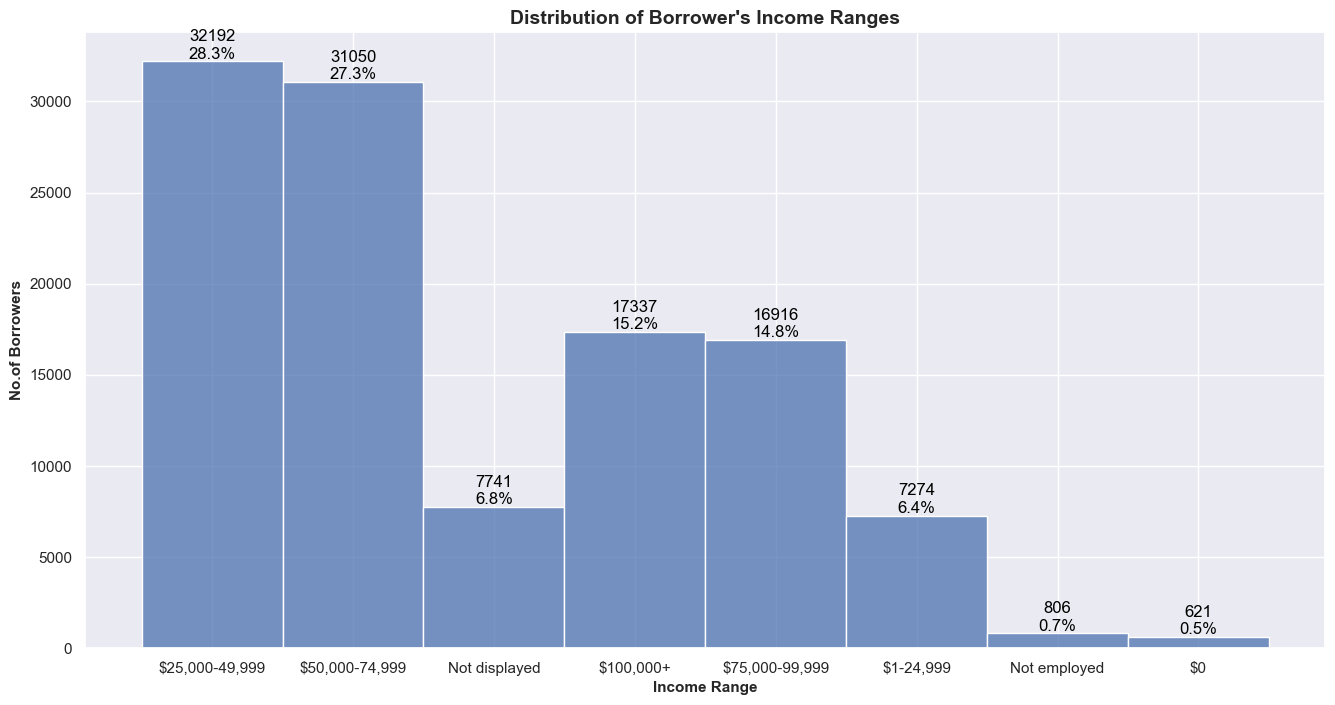

In [11]:
#creating a histogram to shows the trend

#plot the histogram
sns.histplot(data=loan, x='IncomeRange')

#Get current axis on current figure
ax = plt.gca()

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#set the ylim  max value
y_max = loan['IncomeRange'].value_counts().max()

#Creat the data  lable by iterate through the list of axes patches
for p in ax.patches:
    label = '{:.0f}\n{:.1f}%'.format(p.get_height(), 100*p.get_height()/len(loan))
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), label, 
            fontsize=12, color='black', ha='center', va='bottom')
    
#label the x and y axes
plt.xlabel("Income Range", fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("No.of Borrowers", fontdict={'fontsize': 11, 'fontweight': 'bold'})

#add title to the plot
plt.title("Distribution of Borrower's Income Ranges",  fontdict={'fontsize': 14, 'fontweight': 'bold'})

#show the plot
plt.show()

### <center> *Observations.*

*The income range chart was performed to study the distribution of different income range across the borrowers. and from the chart i observed that;*
* *A total of 32,192 borrowers whose income range is between 25,000-49,999 are the highest borrower in the prosper loan company, followed by 31,050 borrowers with the income range of 50,000-74,999.*
* *While borrowers with no income followed by unemployed  and  with income range lower than 25,000 are the lowest borrowers with  0.5%, 0.7% and 6.4% of the total borrowers respectively.*
* *The plot also indicate that the high income earners ranging from 100,000+ only contributes 15.2% of the total borrowers.*

*Summary, this plot show's that the borrowers income range might significantly affect borrowers activites in prosper loan company. In the income range column, no missing value was found and there was no outliers in the chart*

### <center>2. Does the  Employment Status affect the borrowers.

In [12]:
#view the unique values in Employment staus column 
loan.loc[:, "EmploymentStatus"].unique()



array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [13]:
#replace cells that contains 'nan'  with 'Not Avaliable'
loan['EmploymentStatus'] = loan['EmploymentStatus'].fillna('Not available')

#view the emploment status column 
loan.loc[:, "EmploymentStatus"].unique()


array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       'Not employed', 'Part-time', 'Retired'], dtype=object)

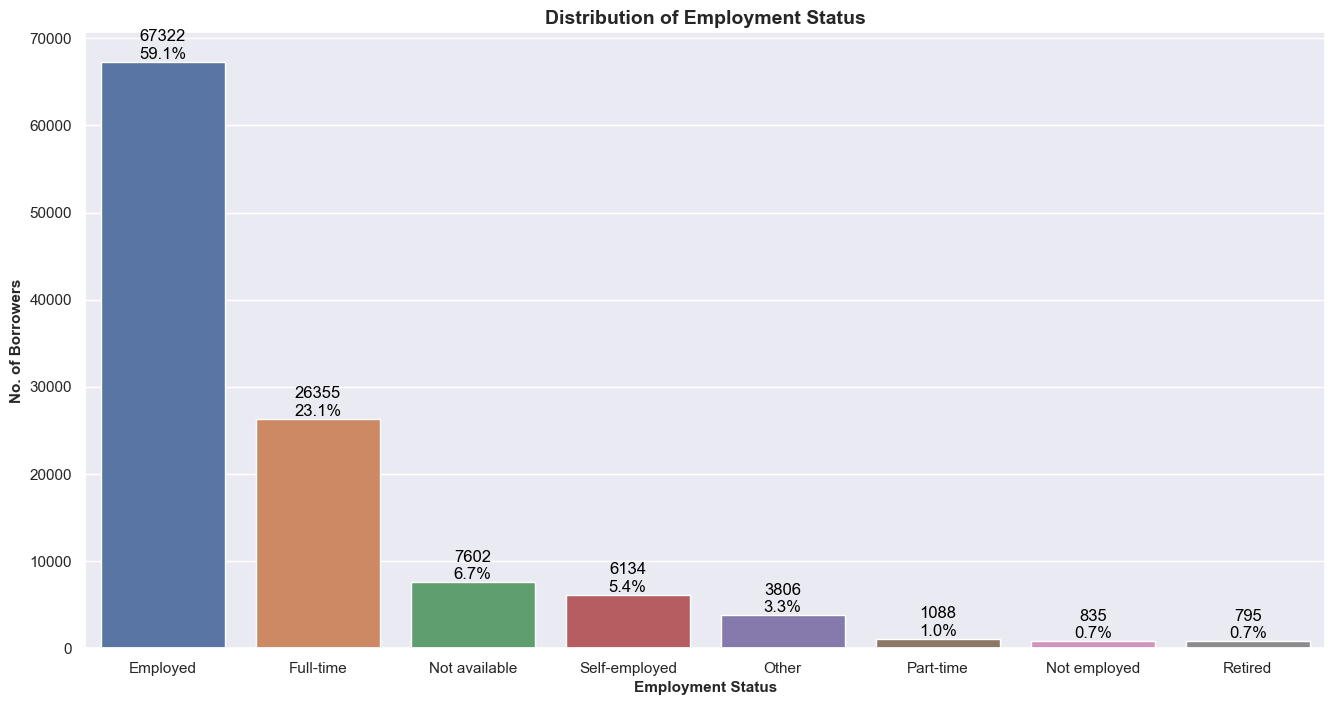

In [15]:
#create a plot to show the employment status distribution

#get the current of the current figure
ax = plt.gca()

#increase the size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#compute the counts of each category
counts = loan["EmploymentStatus"].value_counts(normalize=True)

#sort the categories by count in descending order
counts_sorted = counts.sort_values(ascending=False)

#create the bar plot
sns.countplot(x="EmploymentStatus", data=loan, order=counts_sorted.index)

#ylim max value to be set
y_max = loan['EmploymentStatus'].value_counts().max() 

#iterate through the list of axes' patches
for p in ax.patches:
    label = '{:.0f}\n{:.1f}%'.format(p.get_height(), 100*p.get_height()/len(loan))
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), label, 
            fontsize=12, color='black', ha='center', va='bottom')
    
#set the x-axis label, y-axis label, and title
plt.xlabel("Employment Status",   fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("No. of Borrowers",  fontdict={'fontsize': 11, 'fontweight': 'bold'} )
plt.title(("Distribution of Employment Status"),  fontdict={'fontsize': 14, 'fontweight': 'bold'})


#show the plot
plt.show()



###  <center>*Observations.*

*  *The distribution of the employment status shows that the Employed category with 59.1% of the total borrowers have the highest number of borrowers while the Not employed category, followed by Retired  category with 0.7% are the lowest category of the borrowers.*
    
    
*  *6.7% borrowers didn't provide their employement status. the plot shows that employement status of the borrowers is a significant factor that may affectif the borrower will be given a loan on not in company.*
    
    
*  *During the course of the analysis no outliers was found but the column contains null values with was replaced with 'Not avaliable' in order to have credible outcome*

### <center> 3.The Term majority of the borrowers apply for mostly.

In [16]:
#view the unique values in Term column
loan.loc[:, "Term"]. unique()

array([36, 60, 12], dtype=int64)

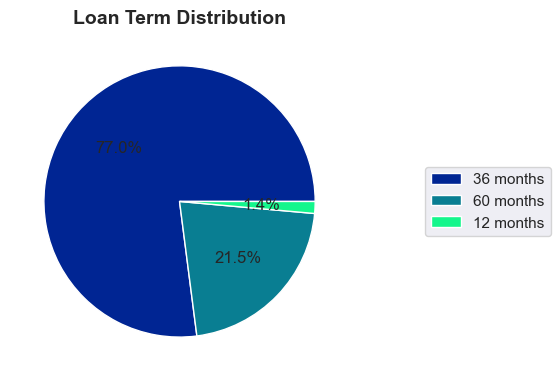

In [17]:
#ploting a pie chart to shoow percentage distribution of the term

#extract the 'Term' column
term_data = loan['Term']

#Group the data by unique values in the 'Term' column
grouped_data = term_data.value_counts()

# Define the colors to use for each slice
colors = ['#002593','#097e92','#14f68c']


#Create a pie chart
plt.pie(grouped_data, autopct='%1.1f%%', colors = colors)

# add the legend labels
legend_labels = ['36 months', '60 months', '12 months']
plt.legend(labels=legend_labels,  loc='center left', bbox_to_anchor=(1.2, 0.5))

# Set the size of the figure
plt.gcf().set_size_inches(6, 6)

# Center the chart
plt.tight_layout()

#Add  a tittle
plt.title('Loan Term Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

#show the Chart
plt.show()

### <center> *Observations.*

*The term distributions chart shows the aggreation of duration given to borrowers for the loan and is expressed in months. 
insight from the chart includes;*
* *The most common term given to borrowers is 36 months with 77% of the total borrowers*
* *The second most occured term is the 60 months with 21.5%*
* *The least applied term is the 12 months with 1.5%*

*The Term distribution chart shows that majority of borrowers applied for loan term of 36 months i.e 3 years. The column doesn't contain null values  or any outliers*

## <center> 4. The most Listing Category use by the borrowers.

In [18]:
#view the unique values in 'Listing category' column
loan.loc[:, "ListingCategory (numeric)"]. unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

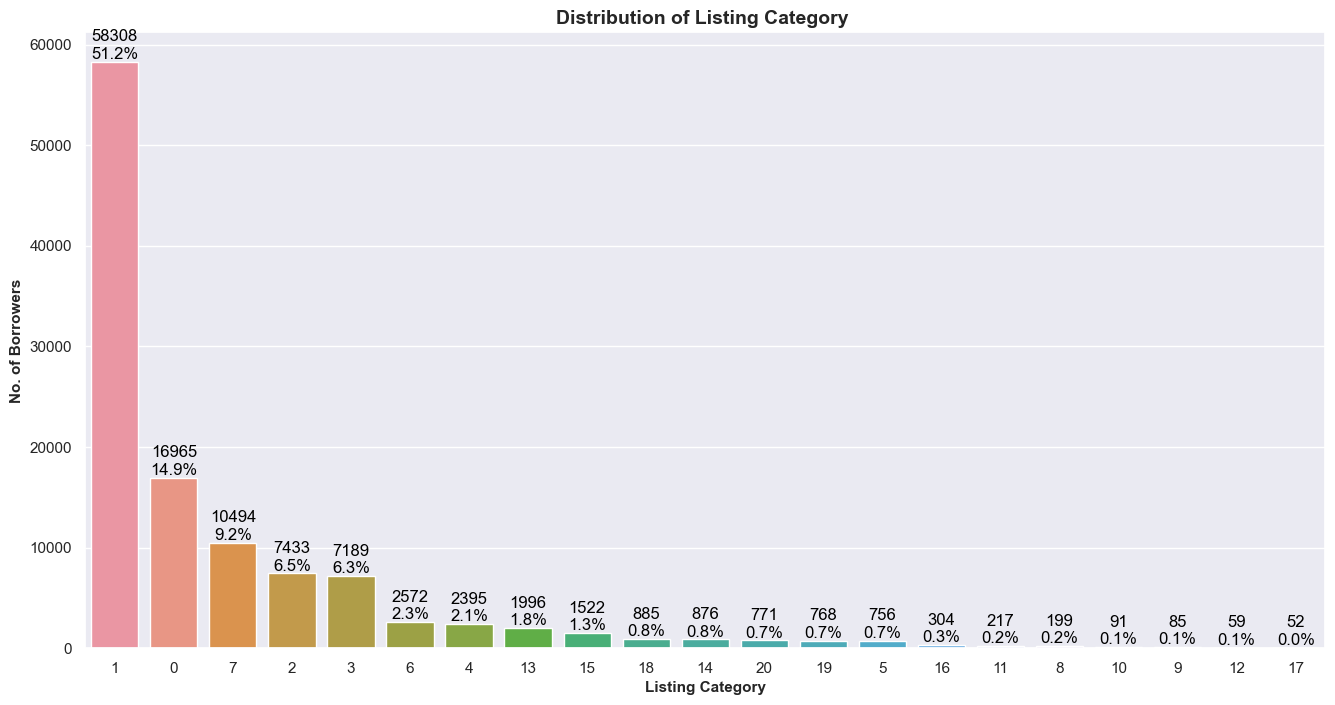

In [19]:
#create the plot to show the listing category.

#get the current of the current figure
ax = plt.gca()

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#Compute the counts of each category
counts = loan["ListingCategory (numeric)"].value_counts(normalize=True)

#Sort the categories by count in descending order
counts_sorted = counts.sort_values(ascending=False)

#Create the bar plot
sns.countplot(x="ListingCategory (numeric)", data=loan, order=counts_sorted.index)

#ylim max value to be set
y_max = loan['ListingCategory (numeric)'].value_counts().max() 

#Iterate through the list of axes' patches
for p in ax.patches:
    label = '{:.0f}\n{:.1f}%'.format(p.get_height(), 100*p.get_height()/len(loan))
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), label, 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Set the x-axis label, y-axis label, and title
plt.xlabel("Listing Category",   fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("No. of Borrowers",  fontdict={'fontsize': 11, 'fontweight': 'bold'} )
plt.title(("Distribution of Listing Category "),  fontdict={'fontsize': 14, 'fontweight': 'bold'})


# Show the plot
plt.show()

###  <center> *Observations.*

*The listing category (numeric) represents The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans*

*The insight from the chart shows that;*
* *58,308 Borrowers which is 51.2% of the total borrowers select 'Debt Consolidation' when posting their listing.*
* *16,965 Borrowers which is 14.9% of the total borrrowers shows that the second most listing category selected by the Borrowers when postingt their listing is the "Not available" category*
* *The least category selected  by the borrowers is the "RV" which is one less than 0.01%of the total borrowers.*

*There is no null values and majority of the borrowers select debt consolidation followed by "Not available", which is chosen by 14.9% of the borrowers either because they don't intend to specify the purpose of the loan or the category they prefer isn't listed. this also doesn't give a clear purpose and  further analysis needs to be carried out *

## <center> 5. The Borrower's APR Distribution.

In [20]:
#view the 'BorrowerAPR' column
loan.loc[:, "BorrowerAPR"]. unique()

array([0.16516, 0.12016, 0.28269, ..., 0.22674, 0.3477 , 0.19543])

In [21]:
#check if the column contains null  vlaues
if loan['BorrowerAPR'].notnull().all():
    print('The column does not contain null values')
else:
    print('The column contains null values')

The column contains null values


In [22]:
# Count the number of null values in the 'column_name' column
num_null = loan['BorrowerAPR'].isnull().sum()

print('The column contains', num_null, 'null values')

The column contains 25 null values


In [23]:
#calculating the percentage of the  null value against the total number of borrowers
percentage = (25 / 113937) * 100
print('The percentage of 25 in 113937 is:', percentage, '%')

The percentage of 25 in 113937 is: 0.02194195037608503 %


***Since the null value is 0.022% of the entire column, the null value can be ignored***

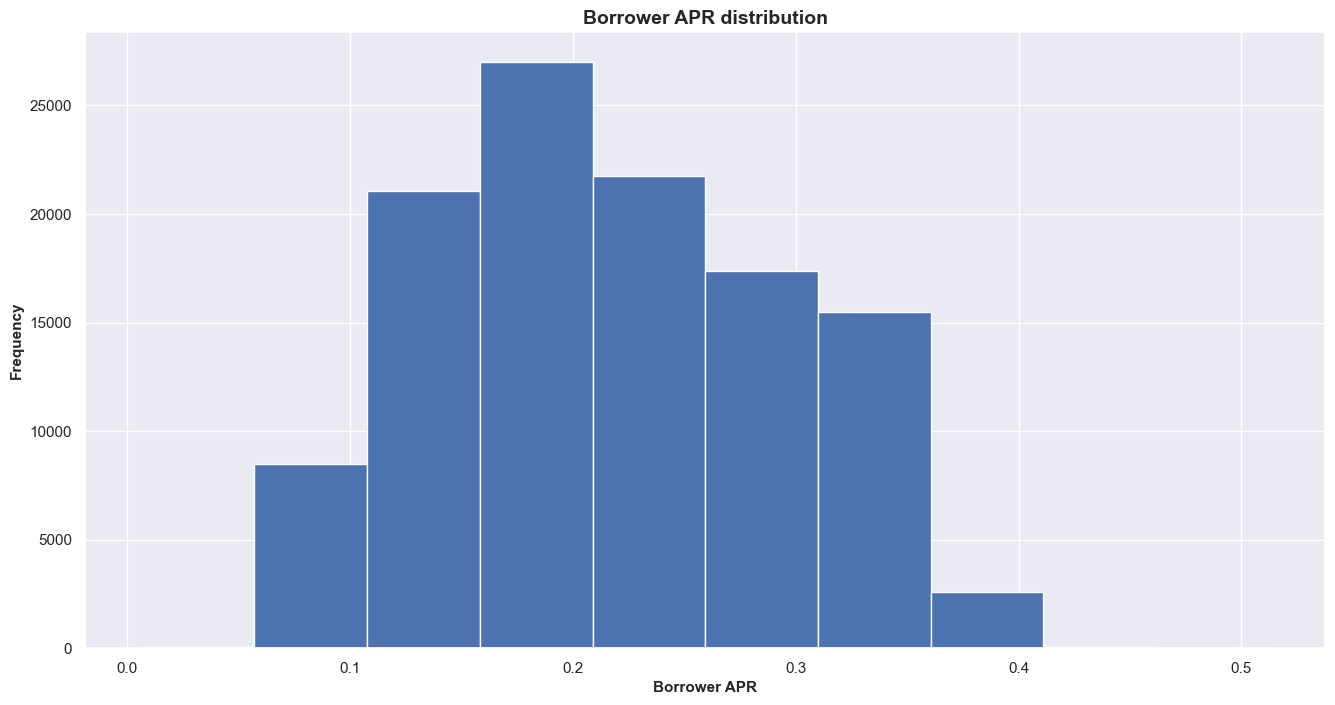

In [24]:
#ploting the histogram to show borrowerAPR trend

# Create a plot
plt.hist(loan["BorrowerAPR"])

# Add a title
plt.title('Borrower APR distribution',  fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Add x and y axis labels
plt.xlabel('Borrower APR',  fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel('Frequency',  fontdict={'fontsize': 11, 'fontweight': 'bold'})

# Show the chart
plt.show()

### <center> *Observations.*

*  *The Borrower's APR is the Borrower's Annual Percentage Rate (APR) for the loan. The chart is normally distributed and shows that the average borrowerAPR is within 0.2*

## <center> 6.The Recommendation Distribution?

In [25]:
#view the unique values in 'Recommendation' column
loan.loc[:, "Recommendations"]. unique()

array([ 0,  2,  1,  4,  3,  9,  5, 16, 39, 21,  7, 14,  8,  6, 24, 19, 18],
      dtype=int64)

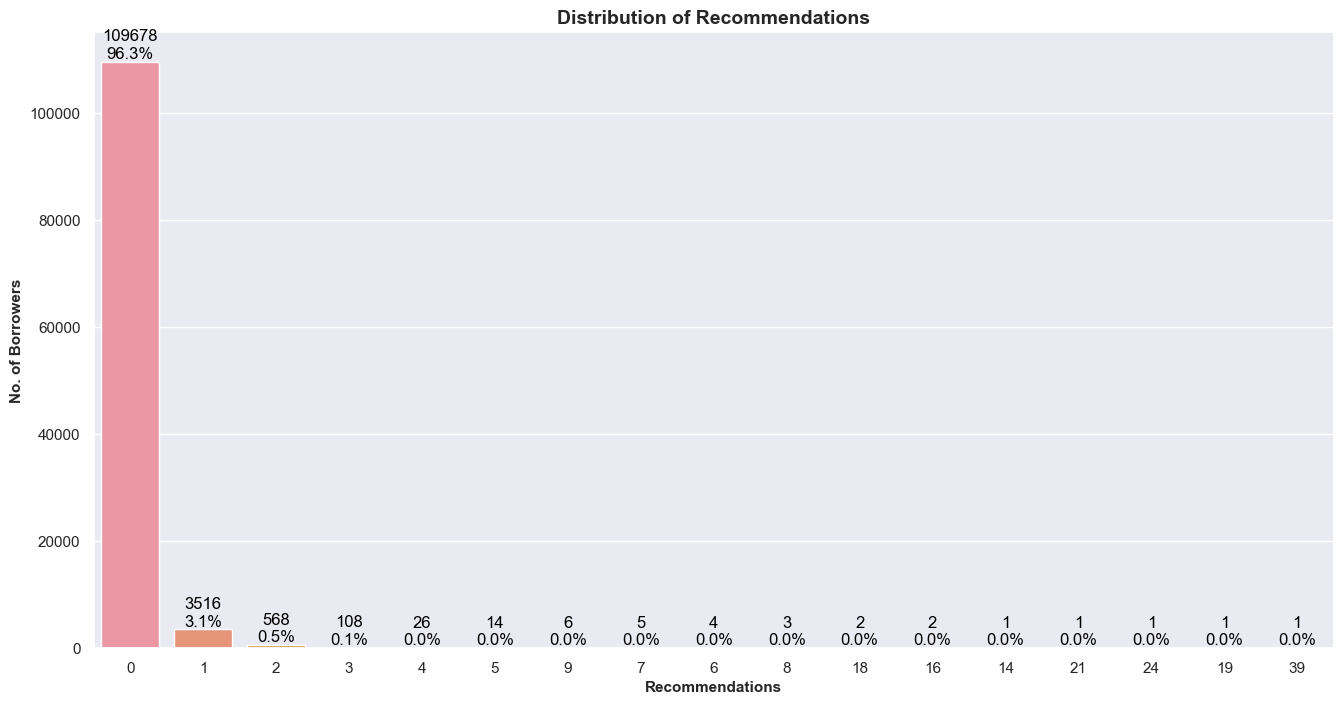

In [26]:
#Create a bar chart to show the recommendation trend

#get  the current of the current figure
ax = plt.gca()

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#Compute the counts of each category
counts = loan["Recommendations"].value_counts(normalize=True)

#Sort the categories by count in descending order
counts_sorted = counts.sort_values(ascending=False)

#Create the bar plot
sns.countplot(x="Recommendations", data=loan, order=counts_sorted.index)

#ylim max value to be set
y_max = loan['Recommendations'].value_counts().max() 

#Iterate through the list of axes' patches
for p in ax.patches:
    label = '{:.0f}\n{:.1f}%'.format(p.get_height(), 100*p.get_height()/len(loan))
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), label, 
            fontsize=12, color='black', ha='center', va='bottom')
    
# Set the x-axis label, y-axis label, and title
plt.xlabel("Recommendations",   fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("No. of Borrowers",  fontdict={'fontsize': 11, 'fontweight': 'bold'} )
plt.title(("Distribution of Recommendations"),  fontdict={'fontsize': 14, 'fontweight': 'bold'})


# Show the plot
plt.show()

### <center> *Observations.*
*  *The recommendation distribution analysis was carried out to observe how the number of recommendation was distriuted with the total borrowers during the listing and how it may or maynot affect the activites of the borrower.*
    
*    *the chart illustrates that 96% of the borrower has no recommendation followed by 3.1% of borrowers who has just one recommendations. This shows that Recommendations isn't a vital criteria for granting loan in prosper loan app.*
    
*The column doesn't contain null values or any outliers.*

## <center>7. The percentage Borrowers that are  Home Owners.

In [27]:
#view the unique values 'IsBorrowerHomeowner' column in the loan dataset
loan.loc[:, "IsBorrowerHomeowner"]. unique()

array([ True, False])

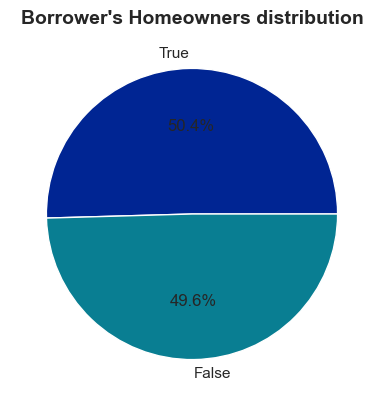

In [29]:
#plot a pie chart to show percentage distribution of the term

#extract the 'Isborrowerhomeowner' column
homeowner_data = loan['IsBorrowerHomeowner']

#Group the data by unique values in the 'homeowner' column
grouped_data = homeowner_data.value_counts()

# Define the colors to use for each slice
colors = ['#002593','#097e92']

#creating of label
labels = loan['IsBorrowerHomeowner'].unique()

#Create a pie chart
plt.pie(grouped_data, labels=labels, autopct='%1.1f%%', colors = colors)

# Set the size of the figure
plt.gcf().set_size_inches(4, 6)

# Center the chart
plt.tight_layout()

#Add  a tittle
plt.title("Borrower's Homeowners distribution", fontdict={'fontsize': 14, 'fontweight': 'bold'})

#show the Chart
plt.show()

### <center> *Observations.*

*The chart shows that 50.4% of Borrowers are home owners and 49.6%  of the total borrowers are not home owners. This implies that difference between borrowers that are homeowners and not homeowners is 0.4% which is insignificant.*
    
*This chart is inconclusive because it dosen't provide much information on whether or not home owner is a vital criteria considered for  borrowers in prosper loan app.There is no nullvalues or outliers in the column*

 ## <center>8. The Loan Original Year Trend.

In [34]:
#view the unique  dates in 'Loan Original date' column in  the  dataset
loan.loc[:, "LoanOriginationDate"].unique()

array(['2007-12-09T00:00:00.000000000', '2014-03-03T00:00:00.000000000',
       '2007-01-17T00:00:00.000000000', ...,
       '2009-07-23T00:00:00.000000000', '2008-10-17T00:00:00.000000000',
       '2005-11-15T00:00:00.000000000'], dtype='datetime64[ns]')

In [35]:
# Convert the 'LoanOriginationDate' column to a datetime column
loan['LoanOriginationDate'] = pd.to_datetime(loan['LoanOriginationDate'])

# Extract the year from the datetime column and save it to a new column called 'year'
loan['year'] = loan['LoanOriginationDate'].dt.year

# View the unique years in the 'year' column
print(loan['year'].unique())

[2007 2014 2012 2013 2006 2010 2011 2008 2009 2005]


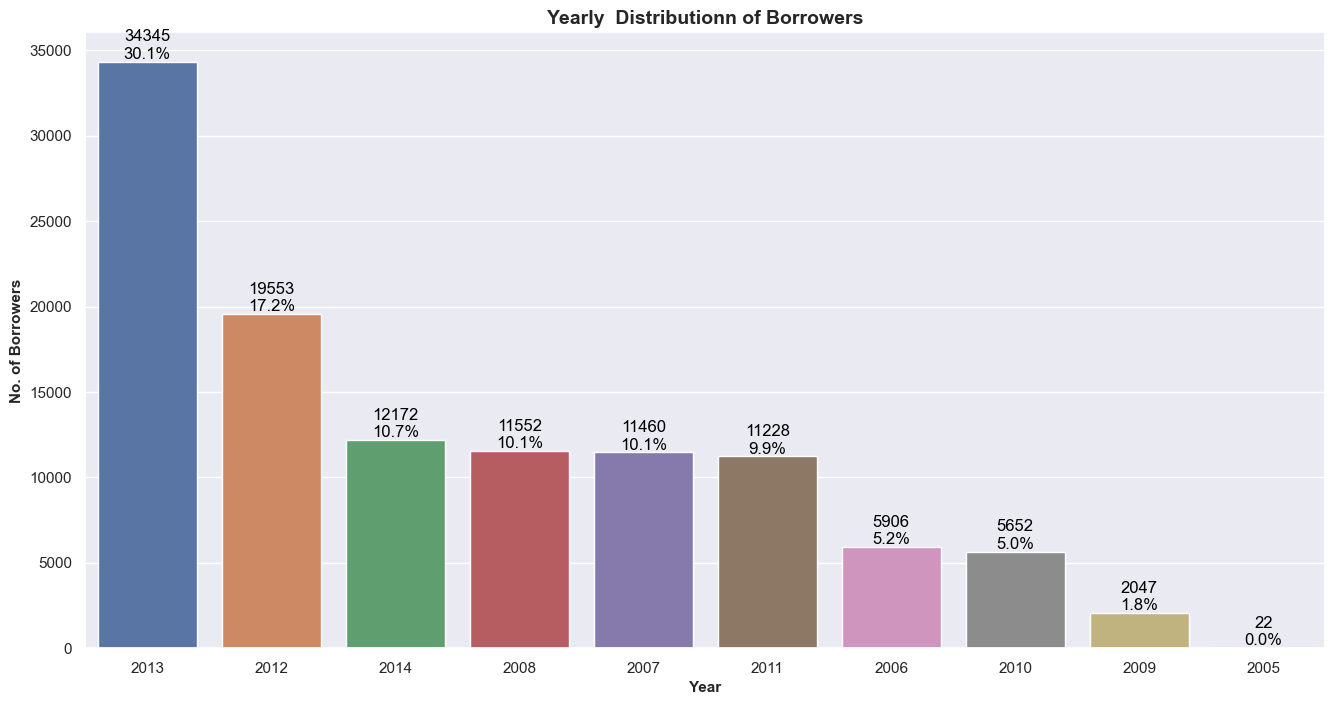

In [36]:
#create a chart to show the year distribution.

#get  the current of the current figure
ax = plt.gca()

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

# Compute the counts of each category
counts = loan["year"].value_counts(normalize=True)

# Sort the categories by count in descending order
counts_sorted = counts.sort_values(ascending=False)

# Create the bar plot
sns.countplot(x="year", data=loan, order=counts_sorted.index)

# ylim max value to be set
y_max = loan['year'].value_counts().max() 

# Iterate through the list of axes' patches
for p in ax.patches:
    label = '{:.0f}\n{:.1f}%'.format(p.get_height(), 100*p.get_height()/len(loan))
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), label, 
            fontsize=12, color='black', ha='center', va='bottom')
    
# Set the x-axis label, y-axis label, and title
plt.xlabel("Year",   fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("No. of Borrowers",  fontdict={'fontsize': 11, 'fontweight': 'bold'} )
plt.title(("Yearly  Distributionn of Borrowers"),  fontdict={'fontsize': 14, 'fontweight': 'bold'})


# Show the plot
plt.show()

### <center> *Observations.*

*The Yearly distribution of borrower is analyzed to observe the total number of borrowers, Prosper loan had  across each year.
The analysis shows the year they had their highest borrowers is on 2013 with  the total of 34,345.
Observantly, from the Chart the increase in customers is inconsistent i.e from 34,345 borrowers 2013, to a decline of 12,172 borrowers in 2014*.
    
*Also, in 2008 with 11,552 borrowers they had a decline to 2,047 borrowers in 2009, which is more like loosing over 70% of their customer. Nevertheless, observing from the year they started which is 2005 the company has significantly increased in the number of customer.*

*The date column was inconsistent and not having the correct data type which  might  make it difficult to extract the year, So, the data type was changed to datetime and the year column was extracted  which was used for tis analysis*


## <center> 9. The loan Status distribution across Borrowers.

In [37]:
#view the unique values in 'Loanstatus' column.
loan.loc[:, "LoanStatus"].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

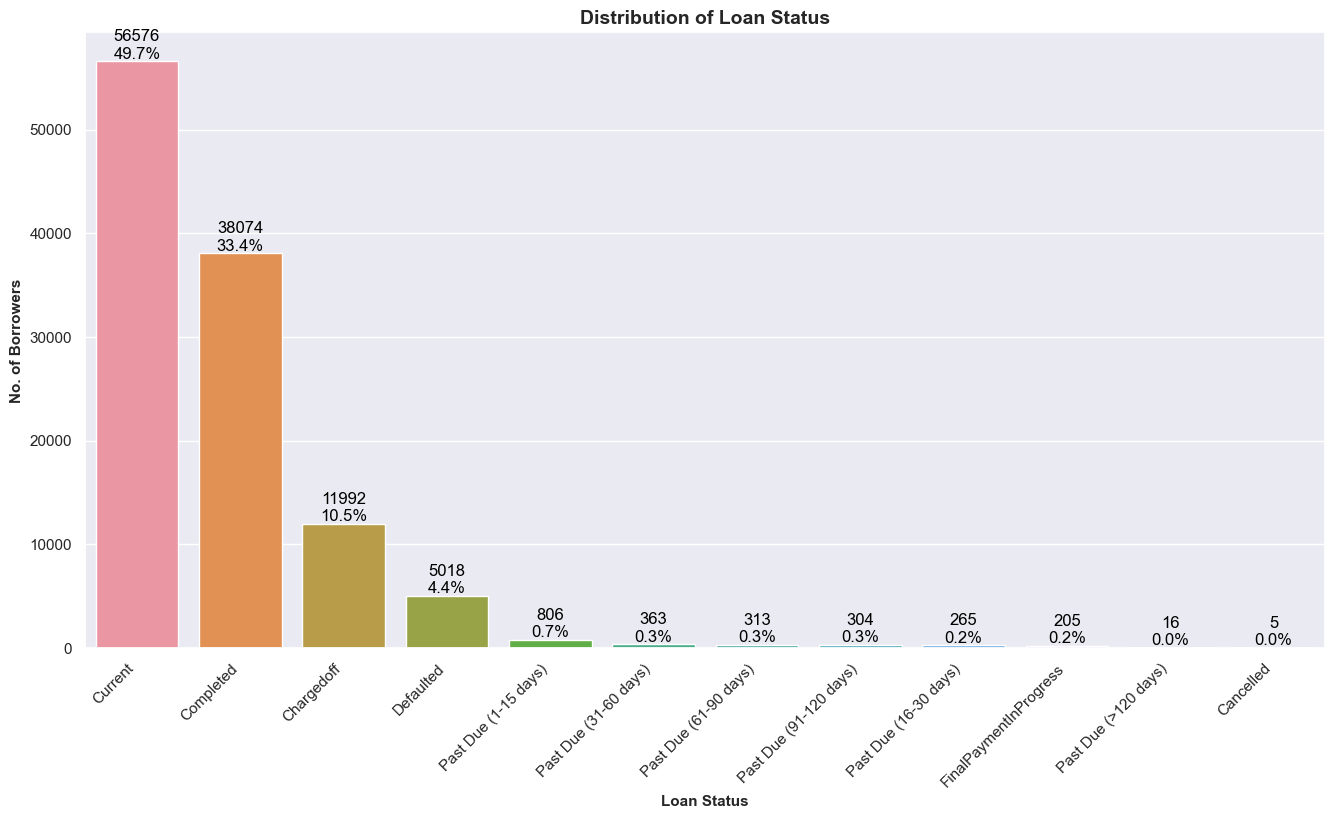

In [39]:
#create a plot  to show the loan status trend

#get  the current of the current figure
ax = plt.gca()

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#Compute the counts of each category
counts = loan["LoanStatus"].value_counts(normalize=True)

#Sort the categories by count in descending order
counts_sorted = counts.sort_values(ascending=False)

#Create the bar plot
sns.countplot(x="LoanStatus", data=loan,order=counts_sorted.index)

#ylim max value to be set
y_max = loan['LoanStatus'].value_counts().max() 

#Iterate through the list of axes' patches
for p in ax.patches:
    label = '{:.0f}\n{:.1f}%'.format(p.get_height(), 100*p.get_height()/len(loan))
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), label, 
            fontsize=12, color='black', ha='center', va='bottom')
    
# Set the x-axis label, y-axis label, and title
plt.xlabel("Loan Status",   fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel("No. of Borrowers",  fontdict={'fontsize': 11, 'fontweight': 'bold'} )
plt.title(("Distribution of Loan Status"),  fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show the plot
plt.show()

### <center> *Observations.*

*The loan status univariate analysis was carried out to show different status distribution of the loan.
The chart shows 49.7% of the loans are still current and 33.4% off the  loan is completed. the  distribution shows that  the borrower's engagement is postive but further analysis need to be carried out in order to understand why 10.5% is Chargedoff and 4.4% is defaulted.*


# <center> Bivariate Analysis

Bivariate Analysis is carried out to find related factors that affects the borrower's activities in the company.some of the variables to analyze for correlation includes;
1.  loan amount and income range
2.  borrower'sAPR and loan amount
3.  loan  amount and home owner
4.  borrower APR  and home owner
5.  loan amount and loan term

### <center> 1. Relationship Between Loan Amount and Income Range.

In [40]:
# Check if the 'Loan  Original amount' column contains null values
if loan['LoanOriginalAmount'].isnull().any():
    print("The 'LoanOriginalAmount' column contains null values.")
else:
    print("The 'LoanOriginalAmount' column does not contain null values.")

The 'LoanOriginalAmount' column does not contain null values.


In [41]:
#view the'Loan Original Amount' column in the dataset
loan.loc[:, "LoanOriginalAmount"]. unique()

array([ 9425, 10000,  3001, ..., 17669, 19432,  4292], dtype=int64)

In [42]:
#view the 'Income range' column
loan.loc[:, "IncomeRange"].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

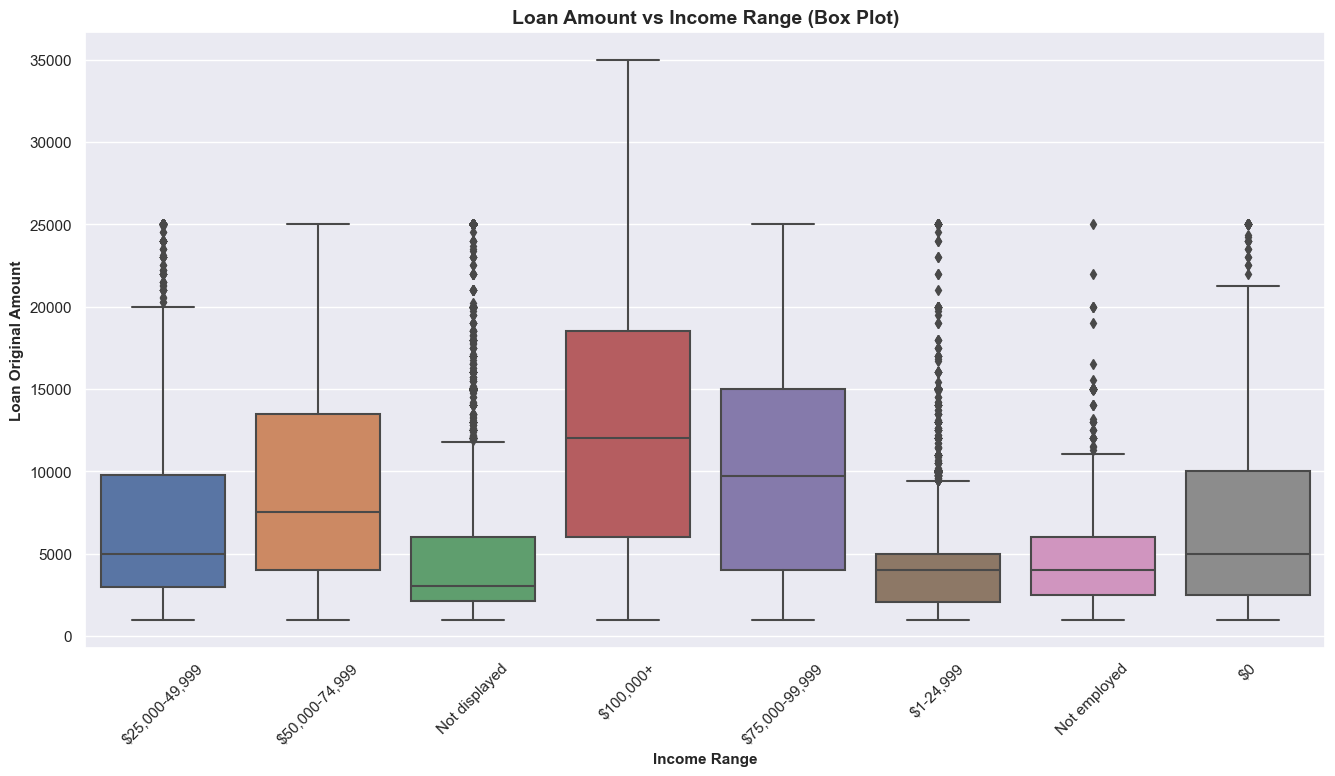

In [43]:
# Create a box plot of loan amount by income range
sns.boxplot(x='IncomeRange', y='LoanOriginalAmount', data=loan)

#Rotate the x-axis label to 45
plt.xticks(rotation=45)

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#label the x-axis and y-axis
plt.xlabel('Income Range',   fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel('Loan Original Amount',   fontdict={'fontsize': 11, 'fontweight': 'bold'})

#Give the Plot a title
plt.title('Loan Amount vs Income Range (Box Plot)',    fontdict={'fontsize': 14, 'fontweight': 'bold'})

#view the plot
plt.show()

***Some of the box plot contains outliers and can affect the central tendency and dispersion of the data. Also the outlier in the data, can make the box plot become skewed, and the whiskers extended to include the outliers. This can result in a box plot that is visually longer than expected, making it difficult to compare the distribution of data between different box plots. So,  the outlier will be removed in order to have a better distribution of the box plot***

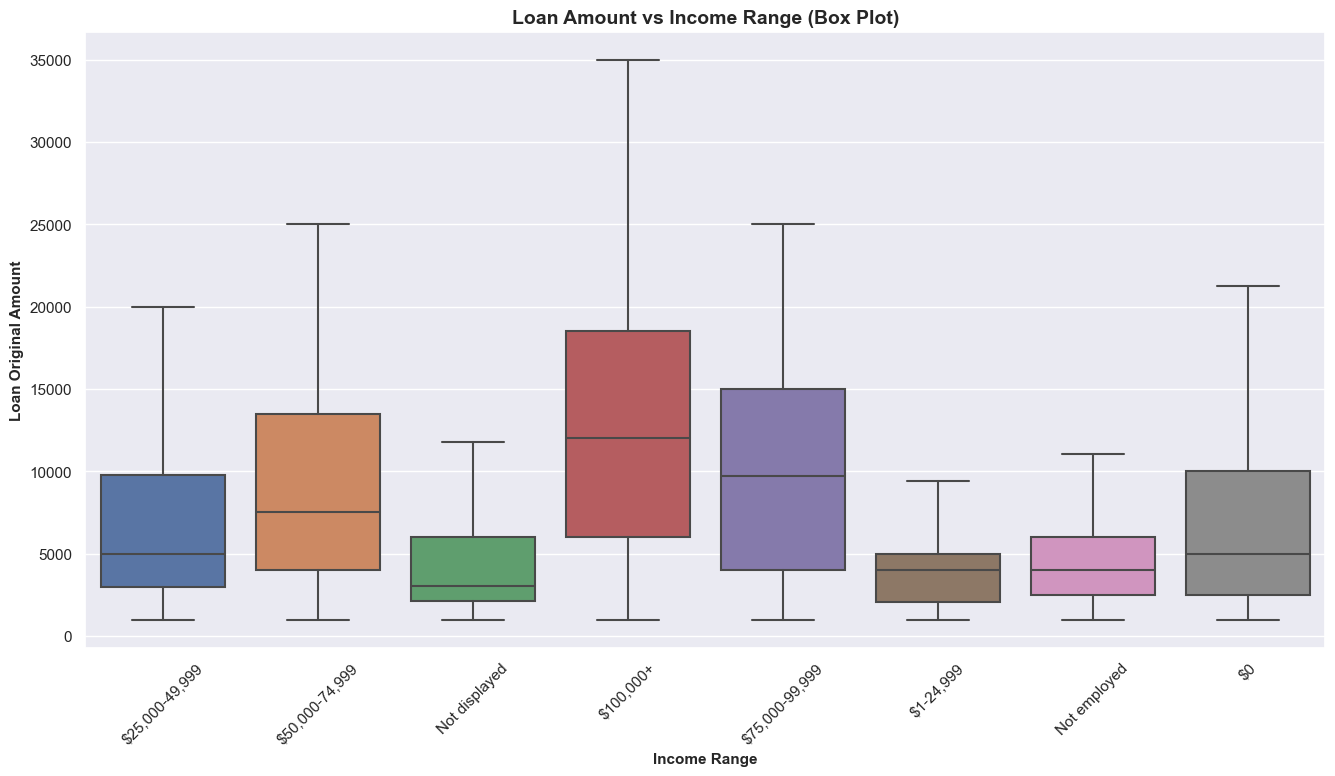

In [44]:
#Box plot without outliers

#Create a box plot of loan amount by income range
sns.boxplot(x='IncomeRange', y='LoanOriginalAmount', data=loan,  showfliers = False)

#Rotate the x-axis label to 45
plt.xticks(rotation=45)

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#label the x-axis and y-axis
plt.xlabel('Income Range',   fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel('Loan Original Amount',   fontdict={'fontsize': 11, 'fontweight': 'bold'})

#Give the Plot a title
plt.title('Loan Amount vs Income Range (Box Plot)',    fontdict={'fontsize': 14, 'fontweight': 'bold'})

#view the plot
plt.show()

### <center> *Observations.*

*After removing the outliers, The box plot shows that borrowers with income range higher than 100,000  has normal distribution with maximum loan amount of 35,000. followed by borrower's which has normal distribution with income range 75,000-99,000 and left skewed distribution on income rangee 50,000-74,000  both with maximum loan amount of 25,000.*
    
*The low loan amount is income rangge of below 25,00 followed by not employed, then the not displayed. This shows the income range has a positive correlation with the loan amount because the hiher the income range the higher the amount of loan given to the borrower.*
*The plot contains outliers which  was removed but no null values*
    

## <center> 2. How correlated is Borrower'sAPR and Loan Amount

In [45]:
#view the 'borrowersAPR' column
loan.loc[:, "BorrowerAPR"].unique()

array([0.16516, 0.12016, 0.28269, ..., 0.22674, 0.3477 , 0.19543])

In [46]:
# Check if the 'BorroweraAPR' column contains null values
if loan['BorrowerAPR'].isnull().any():
    print("The 'BorrowerAPR' column contains null values.")
else:
    print("The 'BorrowerAPR' column does not contain null values.")

The 'BorrowerAPR' column contains null values.


From the previous univariate analysis of borrowerAPR, it shows that the null value in this column is 0.02% of the total number of columns. Therefore the null value can be ignored.

In [47]:
#Change the 'loanAmount' To Numeric
loan['LoanOriginalAmount'] = pd.to_numeric(loan['LoanOriginalAmount'], errors='coerce')

# Check for missing values
print(loan['LoanOriginalAmount'].isna().sum())

0


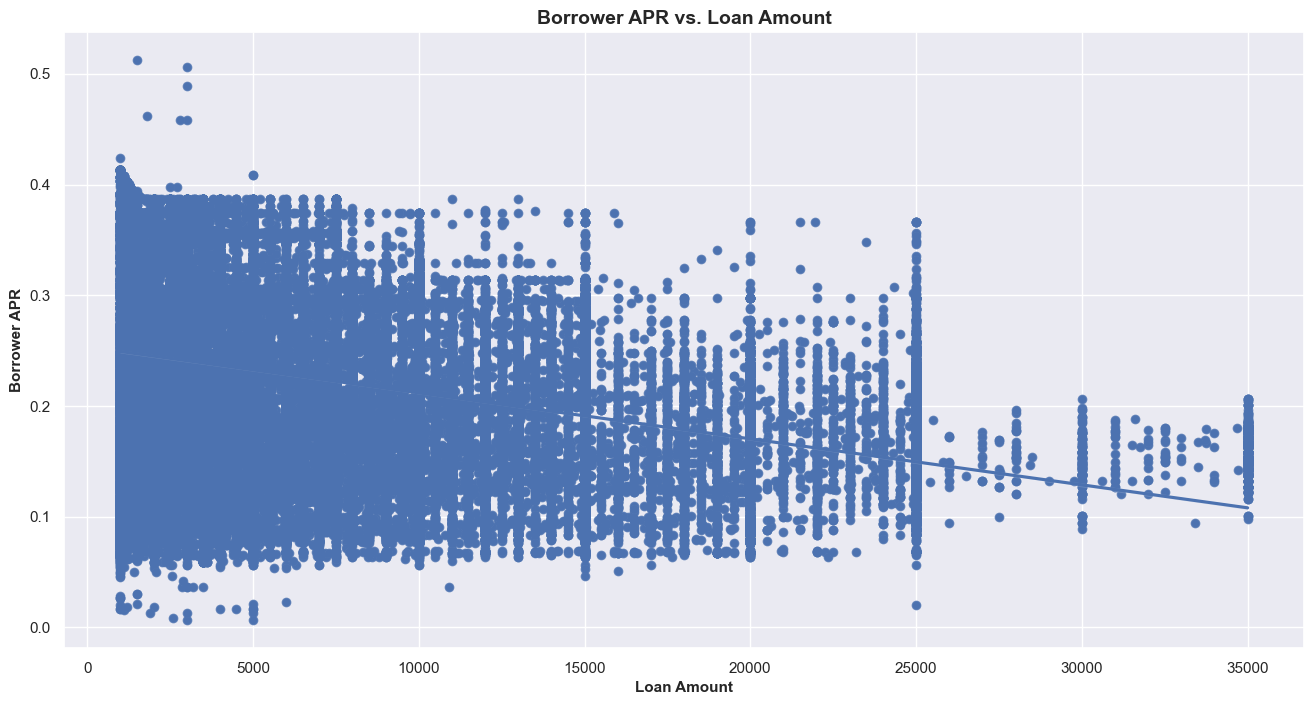

In [49]:
#plot a scatter plot to find the correlation

# Create a scatter plot using seaborn
sns.scatterplot(x='LoanOriginalAmount', y='BorrowerAPR', data=loan)

# Add a regression line to the plot
sns.regplot(x='LoanOriginalAmount', y='BorrowerAPR', data=loan)

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

# Label the x-axis and y-axis
plt.xlabel('Loan Amount', fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel('Borrower APR', fontdict={'fontsize': 11, 'fontweight': 'bold'})

# Add a title to the plot
plt.title('Borrower APR vs. Loan Amount', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Show the plot
plt.show()

### <center>*Observations.*

*The  scatter plot of loan Amount  and borrower APR  is  analyze to observe if there is any corelation between the two factors. the disperation shows that there is a negative linear regression between the two factors. it also implies that as the loan amount is  increasing, the borrowerAPR is decreasing.*

## <center>3. Corelation between Loan Amount and Loan Term. 

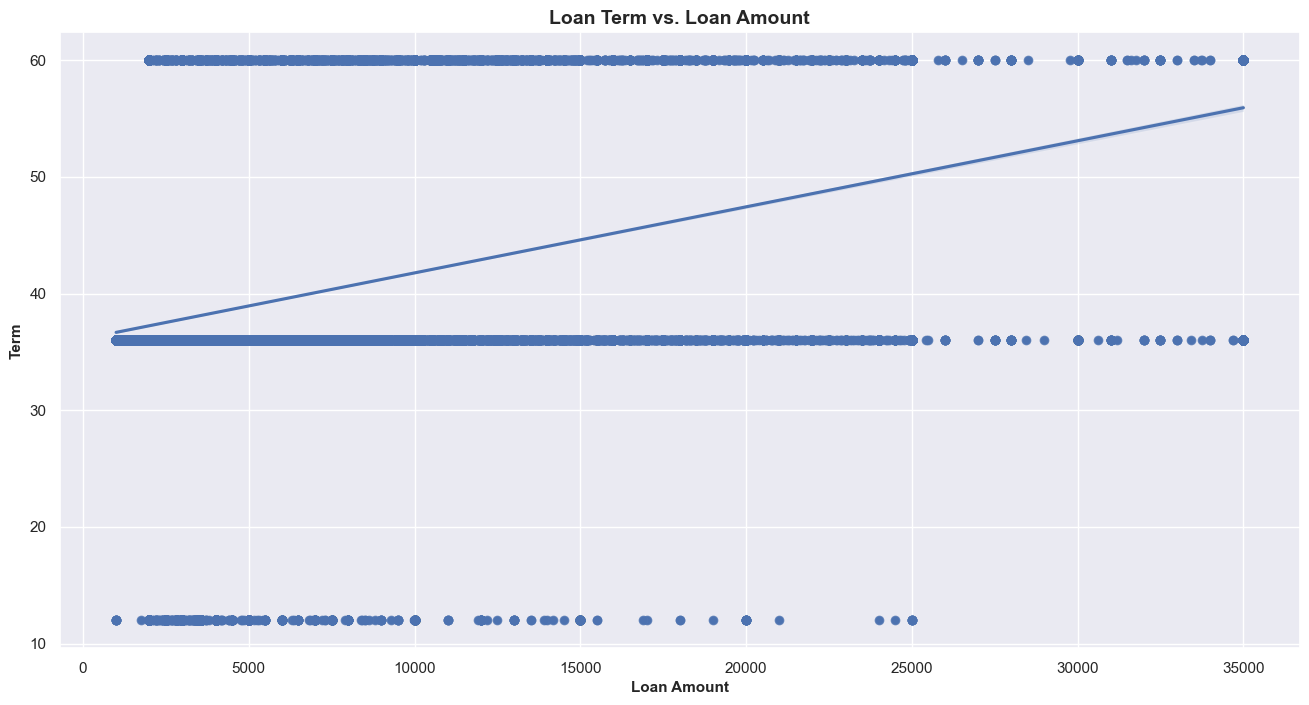

In [50]:
# Create a scatter plot using seaborn
sns.scatterplot(x='LoanOriginalAmount', y='Term', data=loan)

# Add a regression line to the plot
sns.regplot(x='LoanOriginalAmount', y='Term', data=loan)

# Label the x-axis and y-axis
plt.xlabel('Loan Amount', fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel('Term', fontdict={'fontsize': 11, 'fontweight': 'bold'})

# Add a title to the plot
plt.title('Loan Term vs. Loan Amount', fontdict={'fontsize': 14, 'fontweight': 'bold'})

# Show the plot
plt.show()

* ***The plot shows there is no correleation  between the loan  original amount and  12 months term but there is a positive linear correlation for loan amount given within the term duration of 36 months to 60 months. This means that as the month increase from 36 months to 60 months the loan amount given to borrowers also increase significantly.***

* ***The box plot distribution of term and loan amount will be carried to understand distribution of loan amount across the term given to the borrowers.***

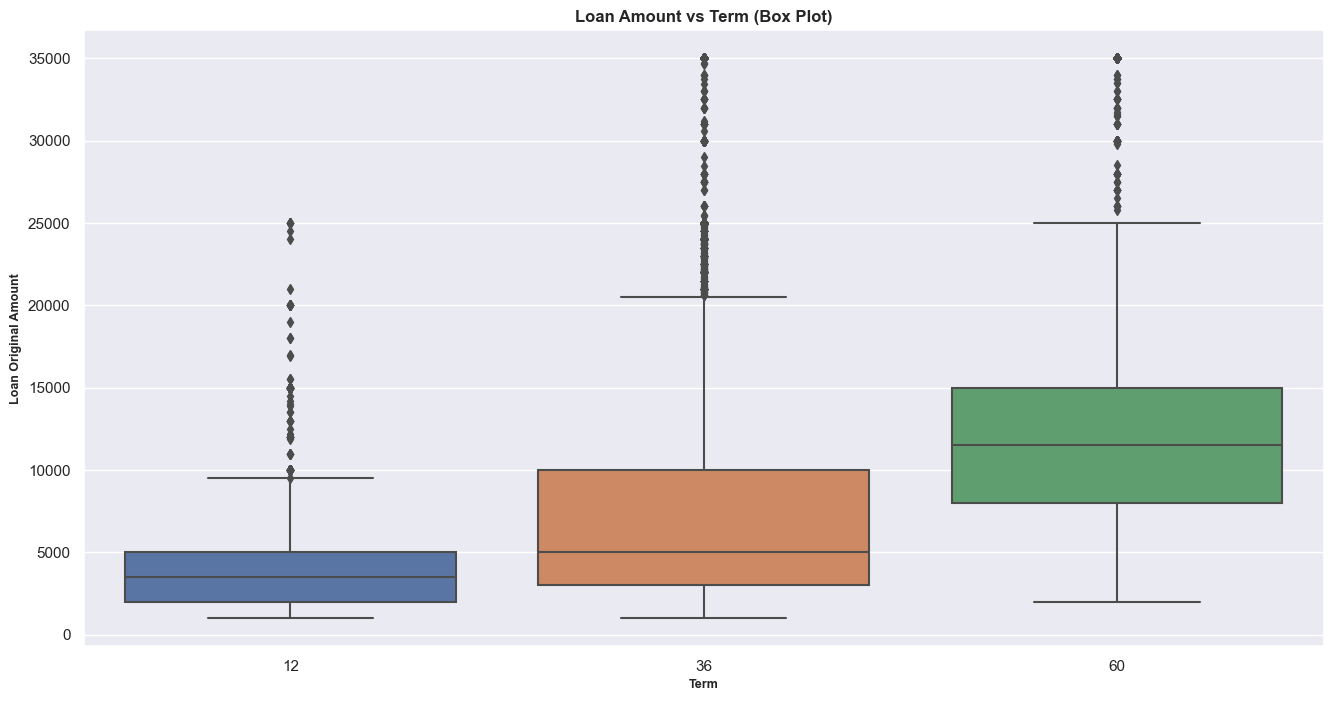

In [51]:
 # Create a box plot of loan amount by income range
sns.boxplot(x='Term', y='LoanOriginalAmount', data=loan)

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#label the x-axis and y-axis
plt.xlabel('Term',   fontdict={'fontsize': 9, 'fontweight': 'bold'})
plt.ylabel('Loan Original Amount',   fontdict={'fontsize': 9, 'fontweight': 'bold'})

#Give the Plot a title
plt.title('Loan Amount vs Term (Box Plot)',   fontdict={'fontsize': 12, 'fontweight': 'bold'})

#view the plot
plt.show()

***The box plot contains outlier and needs to be remove inorder to have proper distribution of the box plot.***

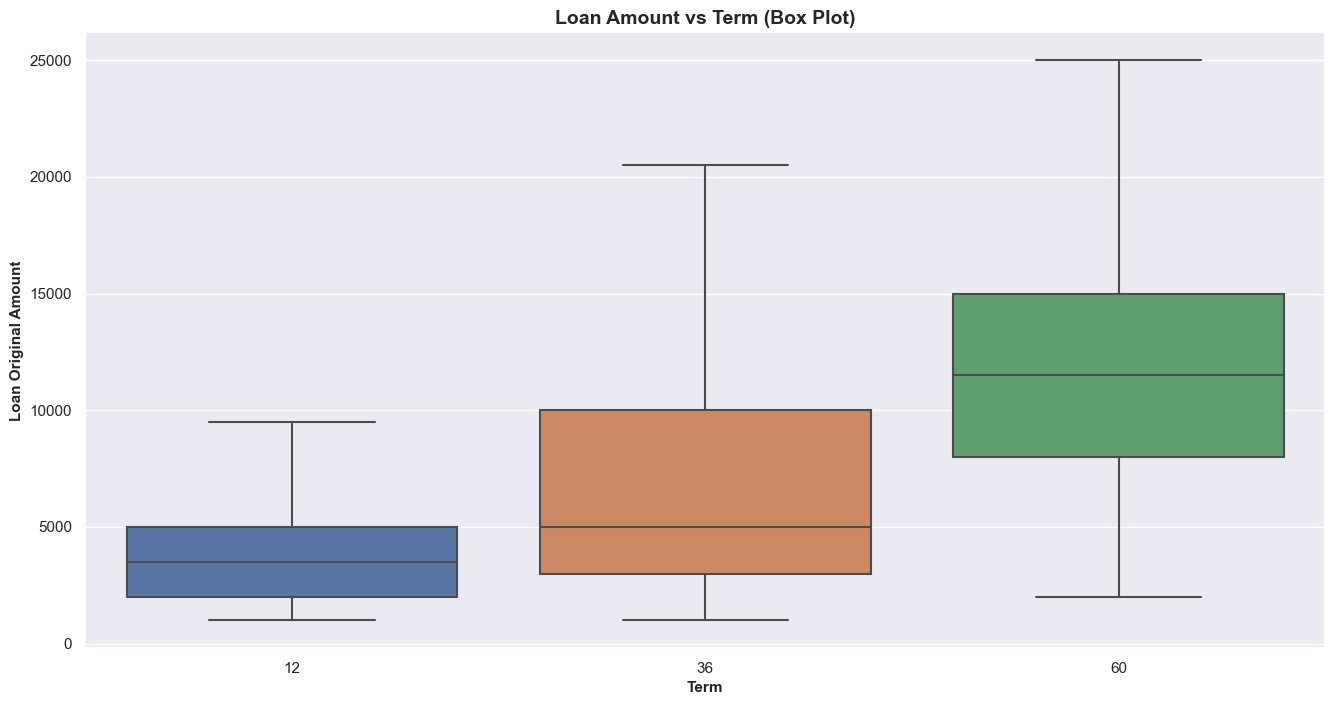

In [54]:
#box plott without outliers

# Create a box plot of loan amount by income range
sns.boxplot(x='Term', y='LoanOriginalAmount', data=loan,  showfliers = False)

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#label the x-axis and y-axis
plt.xlabel('Term',   fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel('Loan Original Amount',   fontdict={'fontsize': 11, 'fontweight': 'bold'})

#Give the Plot a title
plt.title('Loan Amount vs Term (Box Plot)',    fontdict={'fontsize': 14, 'fontweight': 'bold'})

#view the plot
plt.show()

### <center>*Observations.*

*  *The box plot without outliers shows that as the term that is duration estimated for the loan increase the loan  amount increase.*

*  *The  60  month term has the hghest amount the the loan amount of 25,000, followed by 36 months with the maximum of 21,000 and lastly 12 month with the maximum of 9,000.*

## <center> 3.  Loan Term Vs Employment Status

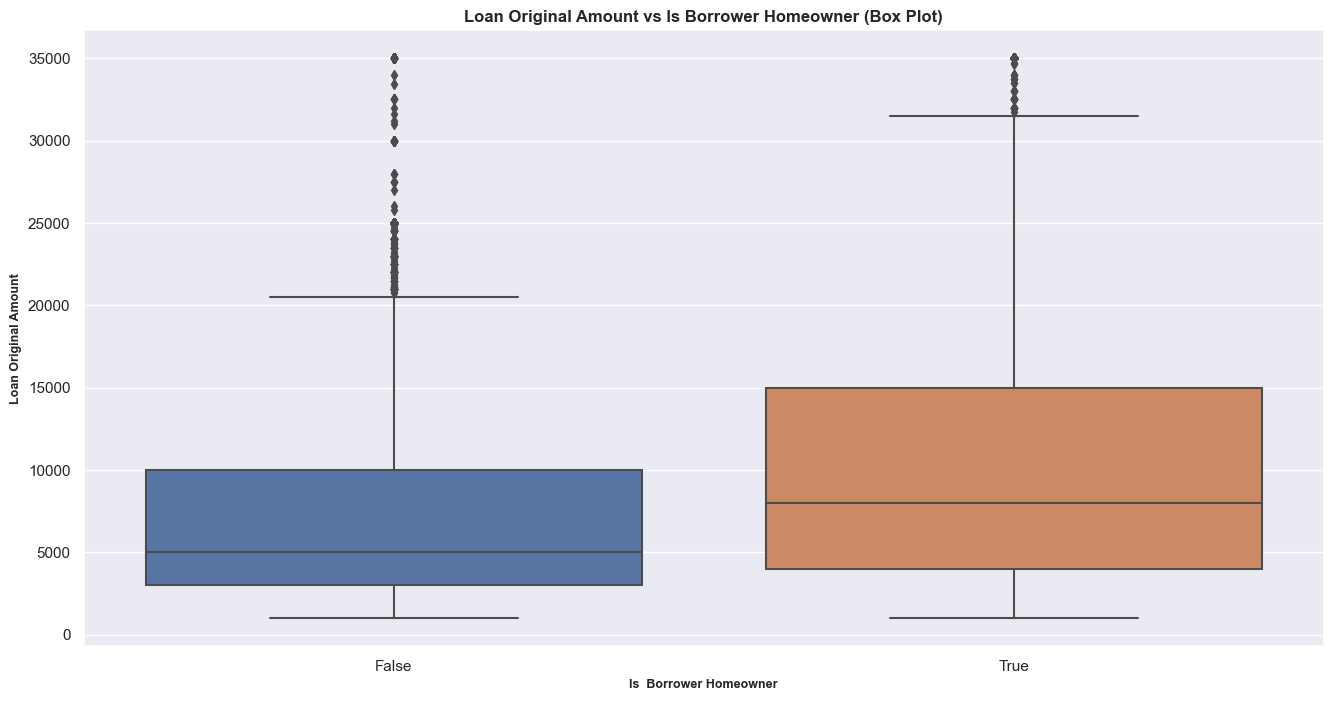

In [55]:
#create the box plot  to show the distribtion of home owner and loan amount

#plot the box plot
sns.boxplot(x='IsBorrowerHomeowner', y='LoanOriginalAmount', data=loan)

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#label the x-axis and y-axis
plt.xlabel('Is  Borrower Homeowner', fontdict={'fontsize': 9, 'fontweight': 'bold'})
plt.ylabel('Loan Original Amount', fontdict={'fontsize': 9, 'fontweight': 'bold'})

#Give the Plot a title
plt.title('Loan Original Amount vs Is Borrower Homeowner (Box Plot)', fontdict={'fontsize': 12, 'fontweight': 'bold'})

#view the plot
plt.show()

*To remove outliers for proper distribution of the chart*

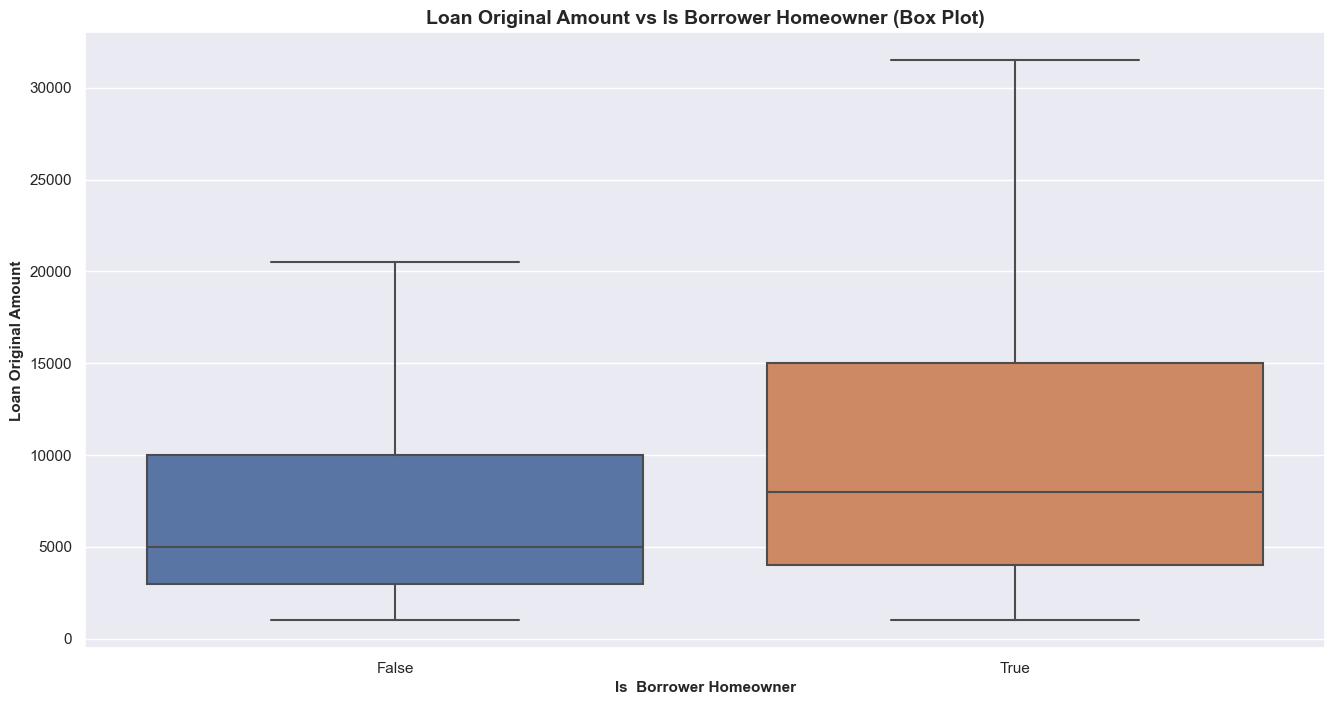

In [59]:
#plot a boxplot
sns.boxplot(x='IsBorrowerHomeowner', y='LoanOriginalAmount', data=loan, showfliers = False)

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#label the x-axis and y-axis
plt.xlabel('Is  Borrower Homeowner', fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel('Loan Original Amount', fontdict={'fontsize': 11, 'fontweight': 'bold'})

#Give the Plot a title
plt.title('Loan Original Amount vs Is Borrower Homeowner (Box Plot)', fontdict={'fontsize': 14, 'fontweight': 'bold'})

#view the plot
plt.show()

### <center>*Observations.*

*  *The chart distributiond of homeowners verse loan original amount shows that where   home owner is true has a maximum of 33,000 loan amount while where home owner is false has the maximum loan amount of 21,000.*

* *This indicates that borrowers who are home owners gets high amount of loan more that borrowers that doesn't have a home*

## <center> 4. Loan Amount and Recommendation.

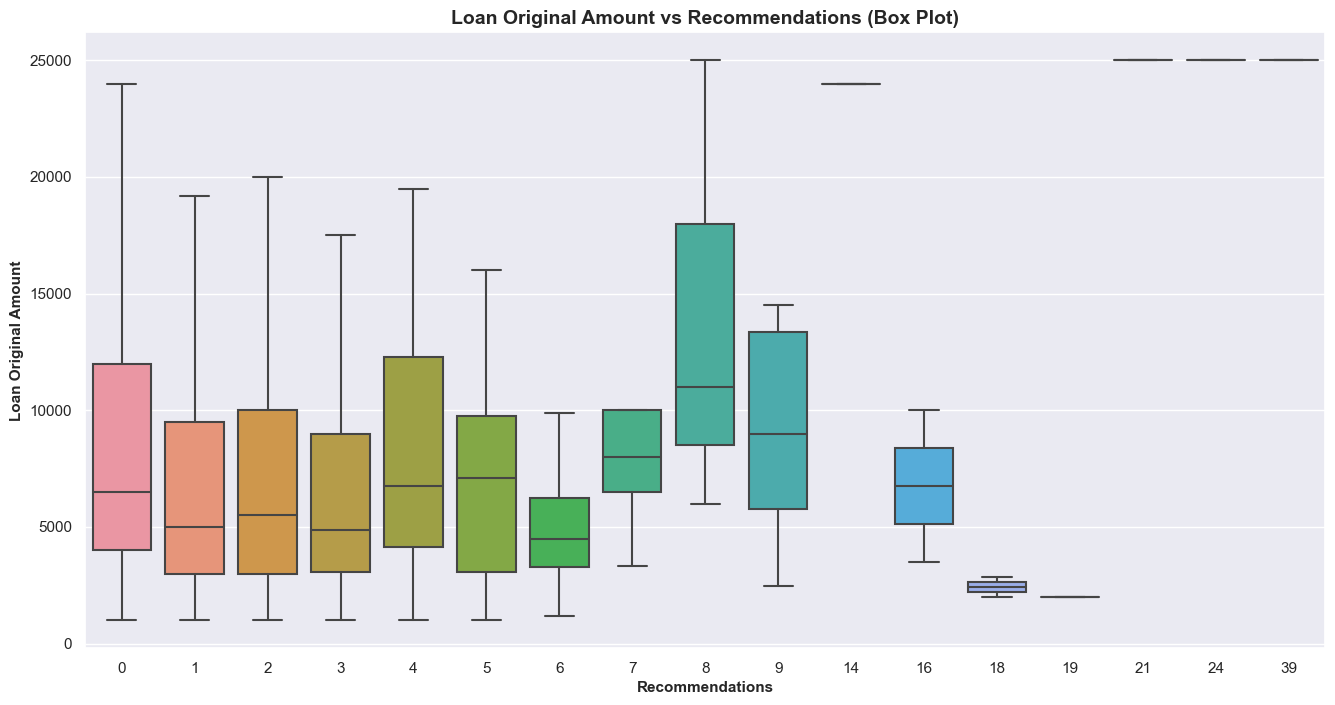

In [60]:
#plot a box plot
sns.boxplot(x='Recommendations', y='LoanOriginalAmount', data=loan, showfliers = False)

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#label the x-axis and y-axis
plt.xlabel('Recommendations', fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel('Loan Original Amount', fontdict={'fontsize': 11, 'fontweight': 'bold'})

#Give the Plot a title
plt.title('Loan Original Amount vs Recommendations (Box Plot)', fontdict={'fontsize': 14, 'fontweight': 'bold'})

#view the plot
plt.show()

## <center> Observations.

*The  bivariate chart between recommendation and loan original amount is done to observe  if there is any corelation and patterns between them.*

*The chart shows that there is no signification relation between the recommendation and the loan original amount, the customers with eight (8) recommendation got the highest average loan amount but the increase or decrease in recommendation number doesn't have any signifcant effect in determing the loan amount that the borrower are given.*

*Finally, further analysis such as muiltivariate analysis may be carried out to see if there any significant criteria where recommendations affects the borrower's activities in the prosper loan company.*

## <center>5. Loan Amount and Listing Category.

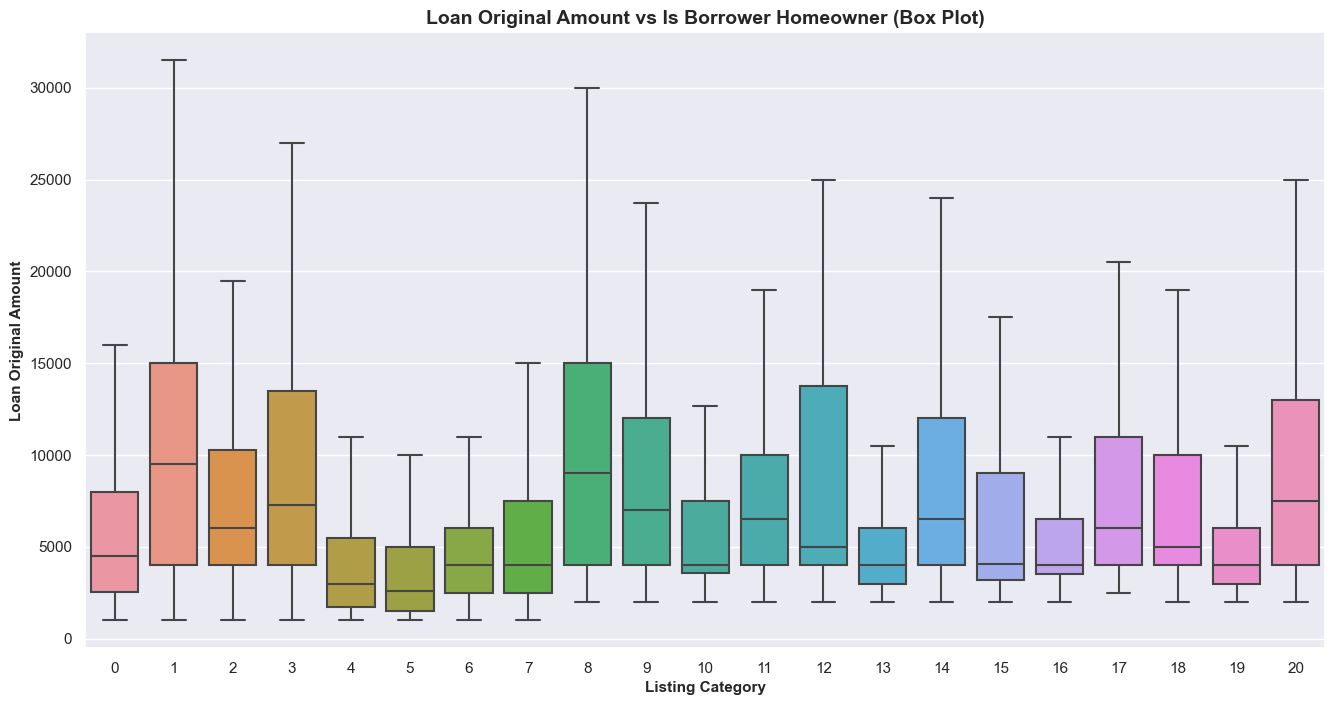

In [62]:
#plot a bx plot
sns.boxplot(x='ListingCategory (numeric)', y='LoanOriginalAmount', data=loan, showfliers = False)

#increase the  size of the plot
sns.set(rc={'figure.figsize':(16,8)})

#label the x-axis and y-axis
plt.xlabel('Listing Category', fontdict={'fontsize': 11, 'fontweight': 'bold'})
plt.ylabel('Loan Original Amount', fontdict={'fontsize': 11, 'fontweight': 'bold'})

#Give the Plot a title
plt.title('Loan Original Amount vs Is Borrower Homeowner (Box Plot)', fontdict={'fontsize': 14, 'fontweight': 'bold'})

#view the plot
plt.show()

## <center> Observations.


*The listing category (numeric) are The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans* 

*From  the distribution the some listing category like debt consolidation, business, baby&Adoption, Green loans, wedding loan has more that 10,000 average amount of loan while some listing has below 5,000 as the average loan amount given to them.*

*This box plot shows that listing category determines the amount of loan given to the borrower*

## <center> Conclusion.

* *While the home owner shows nearly even distriuted in the univariate analysis, it is a significant factor in determing the loan original   amount of the borrowers. Borrower who are home owners tends  to have higher loan amount than borrowers without a home.*

* *Borrower APR and loan orginal amount is the major factor in determining the borrower's activites.* 

In [4]:
#save the updated dataset
loan.to_csv('loan_updated.csv')